                            OLS Regression Results                            
Dep. Variable:         Q("% Dødfisk")   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     46.84
Date:                Thu, 01 May 2025   Prob (F-statistic):           2.72e-61
Time:                        21:36:29   Log-Likelihood:                -885.62
No. Observations:                1810   AIC:                             1787.
Df Residuals:                    1802   BIC:                             1831.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

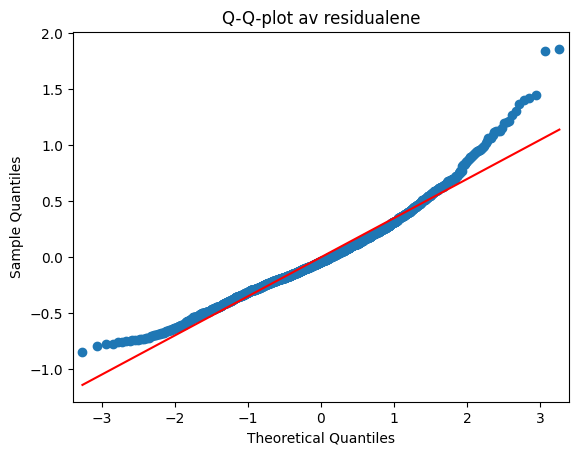

In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import matplotlib.pyplot as plt

# 1) Laste inn data
df = pd.read_csv('/Users/eirikkloosterman/Documents/bachelor/Bachelor/data/processed/summary_statistics.csv', sep=';')

# 2) Konverter dato og lag måned (hvis ikke allerede gjort)
df['Dato'] = pd.to_datetime(df['Dato'], errors='coerce')
df = df.dropna(subset=['Dato'])
df['måned'] = df['Dato'].dt.to_period('M')

# 3) Lag lagget rensefisk-variabel (per PO)
df = df.sort_values(['PO', 'måned'])
df['% Rensefisk_lag1'] = df.groupby('PO')['% Rensefisk'].shift(1)



# 4) Enkel OLS (uten faste effekter)
model = smf.ols('Q("% Dødfisk") ~ Q("Temperature") + Q("% Rensefisk_lag1") + Q("badebehandling") + Q("mekanisk behandling") + Q("termisk behandling") + Q("Tetthet") + Q("BA_ano")', data=df)
result = model.fit()
print(result.summary())

# 5) Faste effekter (PO)
model_fe = smf.ols('Q("% Dødfisk") ~ Q("Temperature") + Q("% Rensefisk_lag1") + Q("badebehandling") + Q("mekanisk behandling") + Q("termisk behandling") + Q("Tetthet") + Q("BA_ano") + C(PO)', data=df)
result_fe = model_fe.fit()
print(result_fe.summary())



# 6) VIF-sjekk
X = result_fe.model.exog
vif_values = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
print('VIF-verdier:')
for i, name in enumerate(result_fe.model.exog_names):
    print(f'{name}: {vif_values[i]:.2f}')

# 7) Breusch-Pagan test
bp_test = het_breuschpagan(result_fe.resid, X)
print(f'Breusch-Pagan p-verdi: {bp_test[1]:.4f}')

# 8) Q-Q-plot
sm.qqplot(result_fe.resid, line='s')
plt.title('Q-Q-plot av residualene')
plt.show()



